For better understanding and collaboration, we decided to divide this task into main 3 subtasks,
1. Prepare the Dataset.
2. Create a classification pipeline with a pretrained machine learning model.
3. Plot the chart based on generated labels.

## 1. Prepare the Data set

Before using any Hugging Face model, We have to clean the data set and make sure it's ready to use with the machine learning model. 

Desired cleaning methods,
1. Drop null rows
2. Remove special characters
3. Convert to lowercase
4. Remove extra white spaces
5. Remove stop words
6. Stemming
7. Lemmatization
8. Tokenization
9. Spell checking 

### Import pandas to read the `wine_reviews.csv`

In [42]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd

wine_reviews = 'wine_reviews.csv'
df = pd.read_csv(wine_reviews)
print(df.head(5))

                                              review
0  Easily the best Sauvignon Blanc I've had to da...
1                    Excellent, Mockingbird Inn?\r\n
2  Absolutely incredible. One of the best sauvign...
3                   Reported in nytimes. Did not try
4  Great. Much different than other Sauv Blancs s...


### 1.1 Drop null values

In [47]:
df = df.dropna(subset=['review'])

### 1.2 Create a method to remove special characters

In [50]:
import re

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

### 1.3 Create a method to convert text into lowercases

In [53]:
def to_lowercase(text):
    return text.lower()

### 1.4. Create a method to remove extra white spaces

In [56]:
def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

### 1.5 Create a method to remove stopwords
We use NLTK(Natural Language Toolkit) stopwords library to check stopwords and remove them from reviews.

In [59]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [61]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ranga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.6 Lemmatization
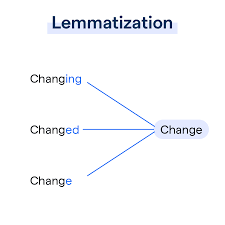 <br>
Lemmatization is the process of reducing words to it's base or dictionary form(lemma). 
We can use,
1. NLTK WordNet lemmatizer or
2. spaCy Lemmatizer

Since we are doing a text classification task with a small dataset, we prefer to use NLTK WordNet lemmatizer. 
Reasons, 
- NLTK Wordnet's context-awareness can be beneficial.
- WordNet's lexical database
- Easy to use with NLTK library

In [64]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(words):
  return [lemmatizer.lemmatize(word) for word in words]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ranga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ranga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ranga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### 1.7 Stemming
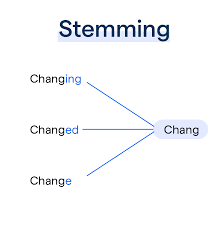 <br>
Stemming is the process of reducing words into it's root form by removing rhe suffixes and prefixes.
There are several stemming algorithms are available,
1. Porter Stemmer <br>
    Offers good balance between speed and accuracy. Suitable for general text processing tasks.
3. Snowball(Porter 2) Stemmer <br>
    An upgraded version of the original porter algorithm. Suitable for accuracy required tasks like linguistic researches.
4. Lancaster Stemmer <br>
    Highly aggressive stemming algorithm. Sitable for highly redundant data.

Since we are doing a text classification task, it's better use `Porter stemmer` over other two algorithms considering the simplicity, efficiency and to achieve a moderate stemming process.

In [67]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stem_text(words):
    return [stemmer.stem(word) for word in words]

### 1.8 Tokenization
We use NLTK tokenizer to tokenize the words.

In [70]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
  return word_tokenize(text)

### <span style="color: red;">Why skip stemming and spell checking ?</span>
1. Lemmatization already normalizes words to their base forms, which can address some issues that spell checking aims to solve, such as different forms of the same word.
2. Spell checkers might not handle domain-specific terminology, proper nouns, or technical terms well. <br>
    In this dataset, some wine wine realed words, like "sauvignon"(Wine bottle name: Merry Edwards Sauvignon Blanc 2023) might be flagged incorrectly, leading to unnecessary corrections.
3. When running spell-cheking function on each word in a row and repeat the same process for 500 rows, considerable processing overhead was added.

Since our dataset is relatively clean already we decided to skip spell-checking and stemming.

### Create a `clean_reviews` function to call above data cleanign steps in an order.

In [74]:
def clean_reviews(text) :
  text = to_lowercase(text)
  text = remove_special_characters(text)
  text = remove_extra_whitespace(text)
  tokens = tokenize_text(text)
  tokens = remove_stop_words(tokens)
  tokens = lemmatize_text(tokens)
  return tokens

### Apply the `cleaning_reviews` method to the DataFrame

In [77]:
df['cleaned_reviews'] = df['review'].apply(clean_reviews)

### Remove the `review` column and save the cleaned reviews in a separate CSV file.
(not usefull now)

In [80]:
df = df.drop('review', axis=1)
print(df.head(10))
df.to_csv('cleaned_reviews.csv', index=False)

                                     cleaned_reviews
0  [easily, best, sauvignon, blanc, ive, date, be...
1                      [excellent, mockingbird, inn]
2  [absolutely, incredible, one, best, sauvignon,...
3                           [reported, nytimes, try]
4  [great, much, different, sauv, blanc, since, a...
5  [nice, balanced, svb, enough, apple, citrus, l...
6  [oak, stone, first, followed, little, peach, f...
7  [stunning, delicious, sophisticated, incompara...
8  [fantastic, expression, napa, sav, blanc, incr...
9  [think, first, cali, sauvignon, blanc, fruity,...


## 2. Create a classification pipeline with a pretrained machine learning model.

### Import pandas and read the `cleaned_reviews.csv` file

In [1]:
import pandas as pd

cleaned_reviews = 'cleaned_reviews.csv'
df = pd.read_csv(cleaned_reviews)

### Install `pipelines` from the `transformers` library.

In [4]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


### Create a zero-shot classification pipeline function using `transformers` library
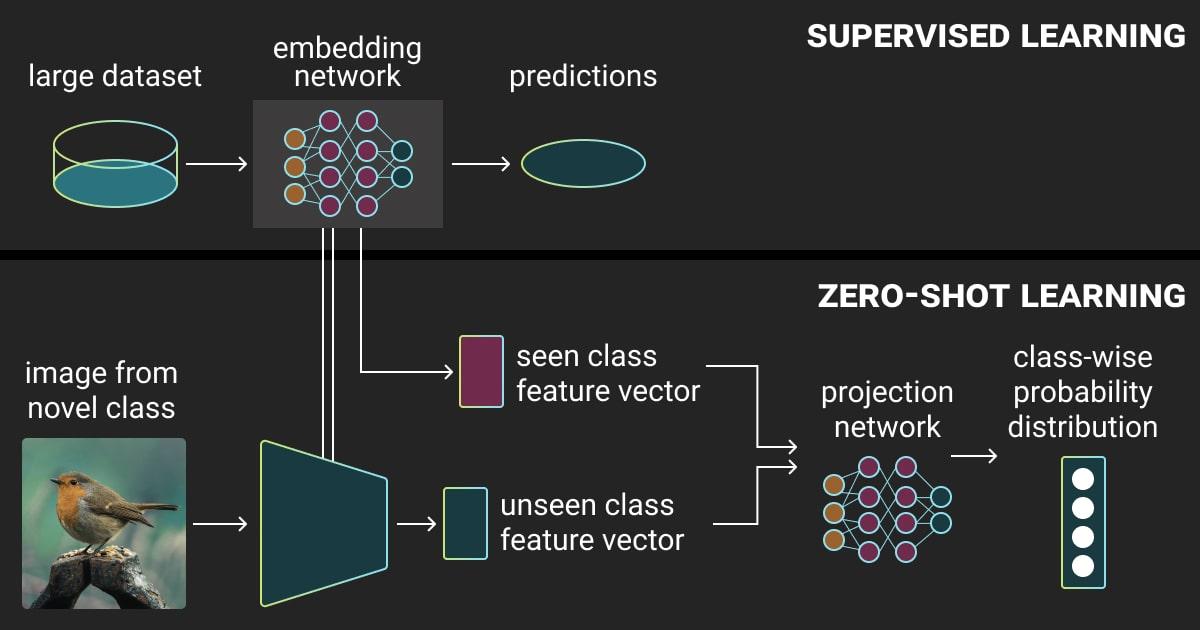
Classification type: `zero-shot-classification` <br>
    Model classify text into categories that it has not seen during its training. The model uses natural language inference (NLI) to determine how well a given piece of text fits into each of the provided candidate labels.
Model: `facebook/bart-large-mnli model`


In [10]:
from transformers import pipeline

classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

Device set to use cpu


**Additionally we use `tqdm` library to create a progress bar to indicate the progress of the classification task.**
This works with the pandas' `apply` function. It will show a progress bar when applying the classifier to the reviews. 
To get the progress bar, we have to use `progress_apply()` instead of the traditional `apply()` method.

In [13]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [15]:
from tqdm import tqdm
tqdm.pandas()

### Apply the classification pipeline function to the `cleaned_reviews` column
During the classification process,
1. **Text Encoding**: Each review and and `candidate_labels` will be encoded into a appropriate format for the model.
2. **Inference**: The model process the encoded inputs. <br>
    For each review, it calculate a score indicating how well the review matches the each label.
3. Then the classifier returns a dictionary containing scores and labels. <br>
Ex: 
```python
{
  'sequence': 'The review text...',
  'labels': ['talks about taste', 'talks about value for money', 'other', 'talks about food combinations'],
  'scores': [0.9, 0.05, 0.03, 0.02]
}
```
Considering these scores for each review, we choose the best match(0th index) from the labels. <br>
`...['labels'][0]`

In [18]:
candidate_labels = [
    "talks about food combinations", 
    "talks about taste", 
    "talks about value for money", 
    "other"
]
df['talks_about'] = df['cleaned_reviews'].progress_apply(lambda x: classifier(x, candidate_labels)['labels'][0])

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [24:39<00:00,  2.96s/it]


### Save labeled reviews to a new CSV file.

In [21]:
df.to_csv('labeled_reviews.csv', index=False)

### <span style="color: red;">Why use 'facebook/bart-large-mnli' ?</span>